#### Epic 1 : 

##### Task 1 : chargement des données :

installer les packages : 

In [1]:
!pip install numpy matplotlib pandas

In [106]:
!pip install seaborn

In [3]:
# les imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_frame = pd.read_csv("assurance-maladie-68d92978e362f464596651.csv")
print("data : \n", data_frame)

data : 
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [5]:
print("(nombre des lignes , nombre des colonnes) = ", data_frame.shape)

(nombre des lignes , nombre des colonnes) =  (1338, 7)


In [6]:
print("Types des données : \n", data_frame.dtypes)

Types des données : 
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
print("Les colonnes : \n", data_frame.columns)

Les colonnes : 
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [8]:
print("Les première lignes : \n", data_frame.head())

Les première lignes : 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [10]:
print("Le nombre des hommes des femmes : ")
data_frame['sex'].value_counts()

Le nombre des hommes des femmes : 


sex
male      676
female    662
Name: count, dtype: int64

##### Task 2:  Analyse exploratoire

In [18]:
print("Types des données : ", data_frame.dtypes)

Types des données :  age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [12]:
print("Statistiques descriptives (numériques) :\n", data_frame.describe(include=['number']))

Statistiques descriptives (numériques) :
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [19]:
print("Statistiques descriptives (catégoriques) :\n", data_frame.describe(include=['object']))

Statistiques descriptives (catégoriques) :
          sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [13]:
print("Statistiques descriptives (all) :\n", data_frame.describe(include='all'))

Statistiques descriptives (all) :
                 age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              Na

In [14]:
print("\nValeurs uniques par colonne :\n", data_frame.nunique())


Valeurs uniques par colonne :
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


- Identifier les valeurs manquantes et les doublons.

In [ ]:
# Les valeurs manquantes.
print("Identifier les valeurs manquantes par colonne : ")
data_frame.isnull().sum()

Identifier les valeurs manquantes : 


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
# Identifier les doublons.

print("Identifier lesvaleurs  doublons: ", data_frame.duplicated().sum())


Identifier lesvaleurs  doublons:  1


- Analyser la distribution des variables numériques

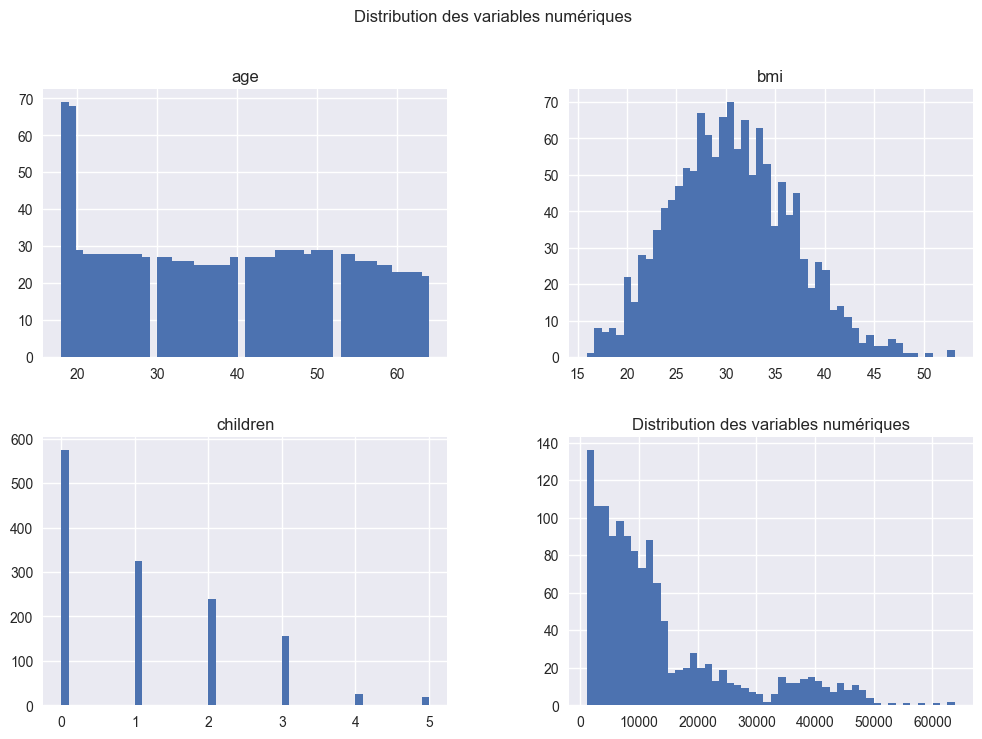

In [61]:
data_frame.hist(bins=50, figsize=(12, 8))
plt.title('Distribution des variables numériques')
plt.suptitle('Distribution des variables numériques')
plt.show()

* Répartition du nombre d'enfants

<Axes: title={'center': "Répartition du nombre d'enfants"}, xlabel='children'>

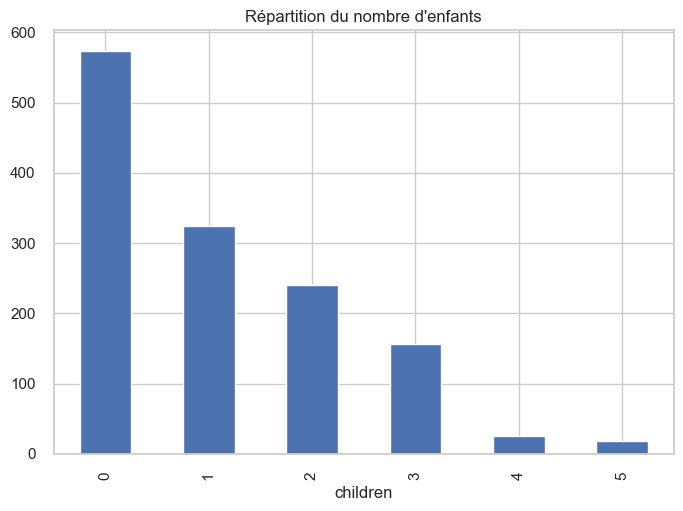

In [105]:
data_frame['children'].value_counts().plot.bar(title="Répartition du nombre d'enfants")

* Charges par rapport à l'âge (fumeur / non fumeur)

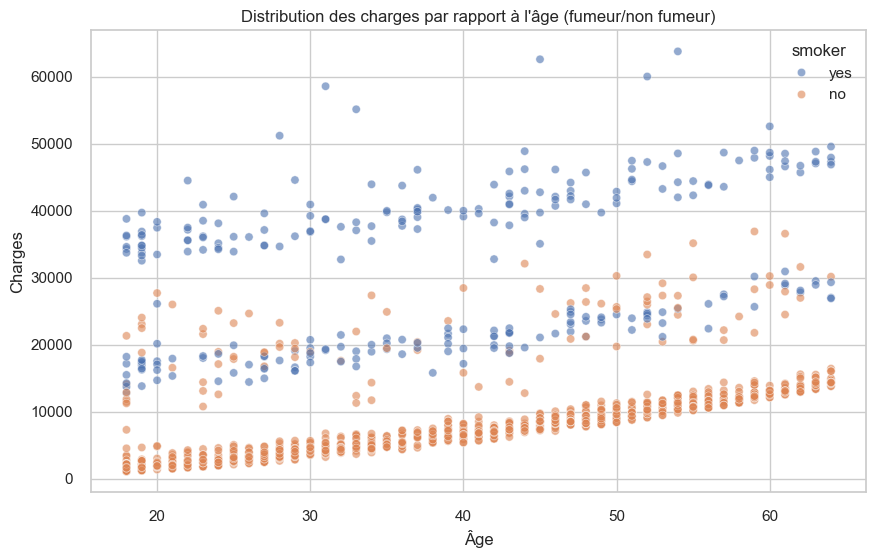

In [128]:
import seaborn as sbr
import matplotlib.pyplot as plt

sbr.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sbr.scatterplot(data=data_frame, x="age", y="charges", hue="smoker", alpha=0.6)
plt.title("Distribution des charges par rapport à l'âge (fumeur/non fumeur)")
plt.xlabel("Âge")
plt.ylabel("Charges")
plt.show()

* Charges par rapport à l'âge (sex)

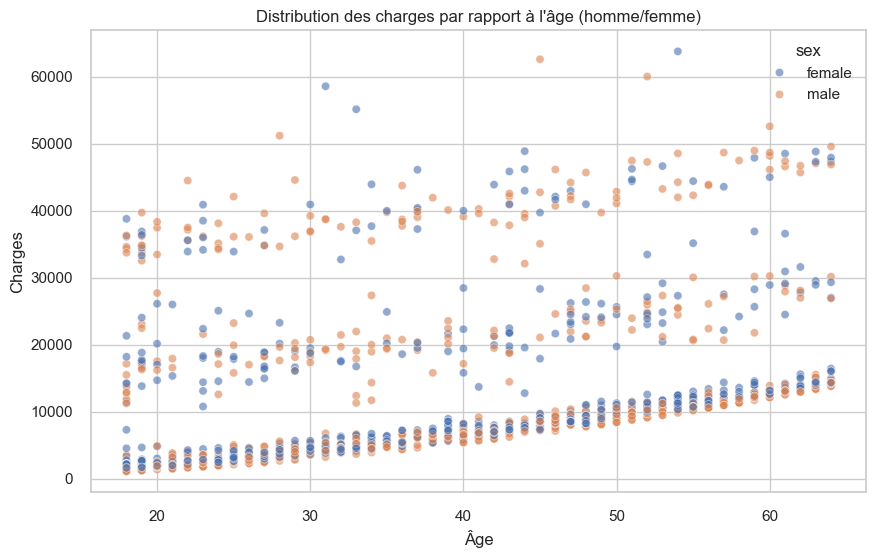

In [132]:
import seaborn as sbr
import matplotlib.pyplot as plt

sbr.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sbr.scatterplot(data=data_frame, x="age", y="charges", hue="sex", alpha=0.6)
plt.title("Distribution des charges par rapport à l'âge (homme/femme)")
plt.xlabel("Âge")
plt.ylabel("Charges")
plt.show()

* Charges par rapport au BMI (fumeur / non fumeur)

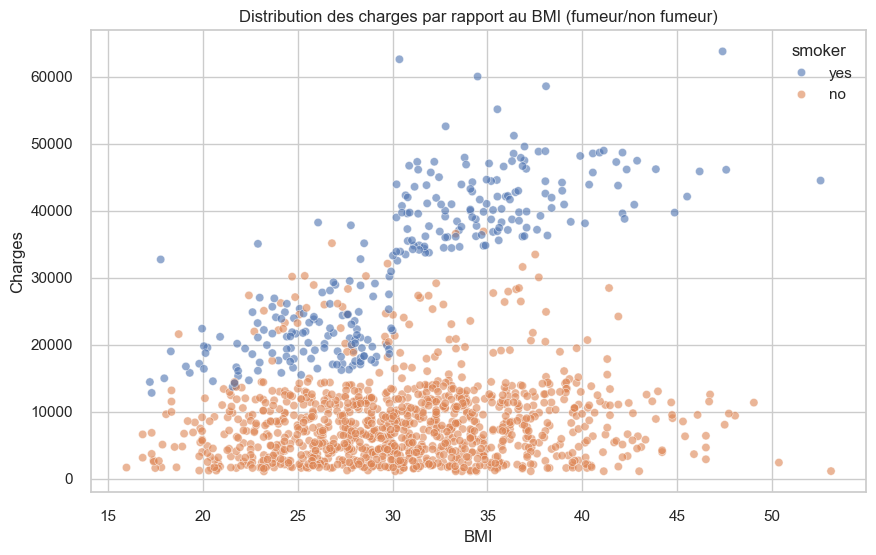

In [135]:
plt.figure(figsize=(10, 6))
sbr.scatterplot(data=data_frame, x="bmi", y="charges", hue="smoker", alpha=0.6)
plt.title("Distribution des charges par rapport au BMI (fumeur/non fumeur)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

* Distribution des charges par rapport au BMI (homme/femme)

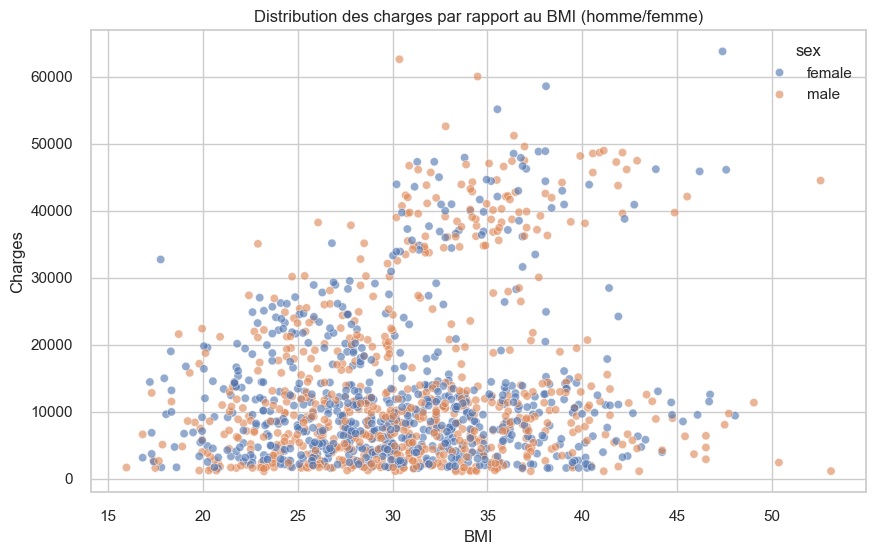

In [136]:
plt.figure(figsize=(10, 6))
sbr.scatterplot(data=data_frame, x="bmi", y="charges", hue="sex", alpha=0.6)
plt.title("Distribution des charges par rapport au BMI (homme/femme)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

* Pairplot des variables numériques selon le statut fumeur

Text(0.5, 1.02, 'Pairplot des variables numériques selon le statut fumeur')

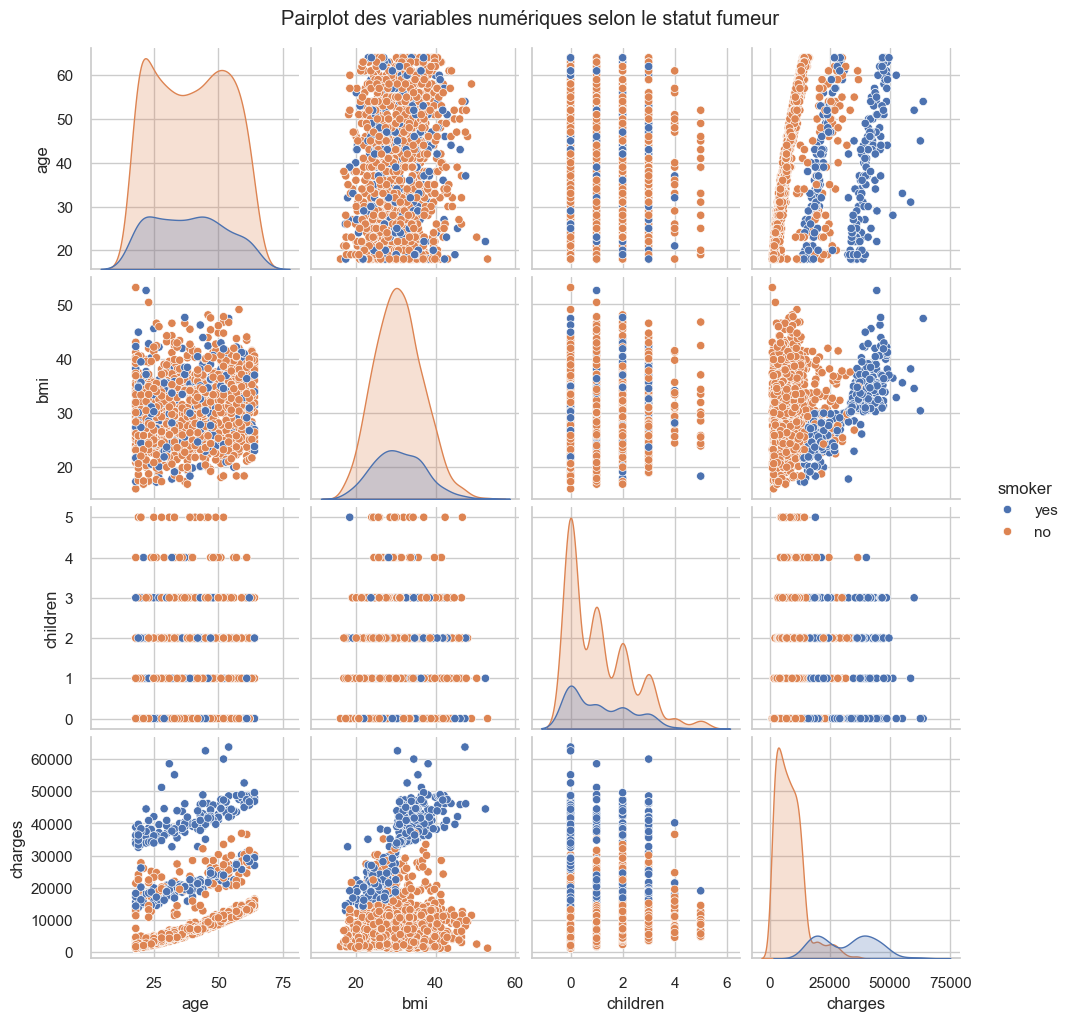

In [172]:
pairplot_fig = sbr.pairplot(data_frame, hue='smoker', height=2.5)
pairplot_fig.fig.suptitle("Pairplot des variables numériques selon le statut fumeur", y=1.02)

* Distribution de l'indice de masse corporelle (BMI)

C:\Users\ramas\AppData\Local\Temp\ipykernel_17104\4246314706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['bmi'], kde=True)


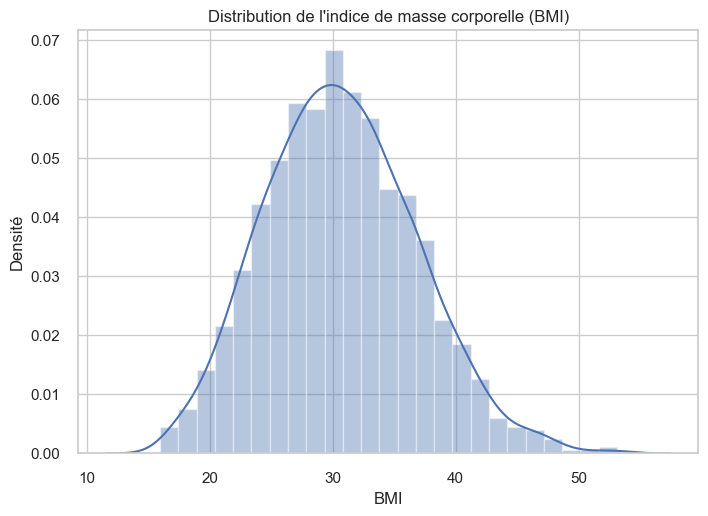

In [174]:
sns.distplot(data_frame['bmi'], kde=True)
plt.title("Distribution de l'indice de masse corporelle (BMI)")
plt.xlabel("BMI")
plt.ylabel("Densité")
plt.show()

* Charges par rapport au sexe

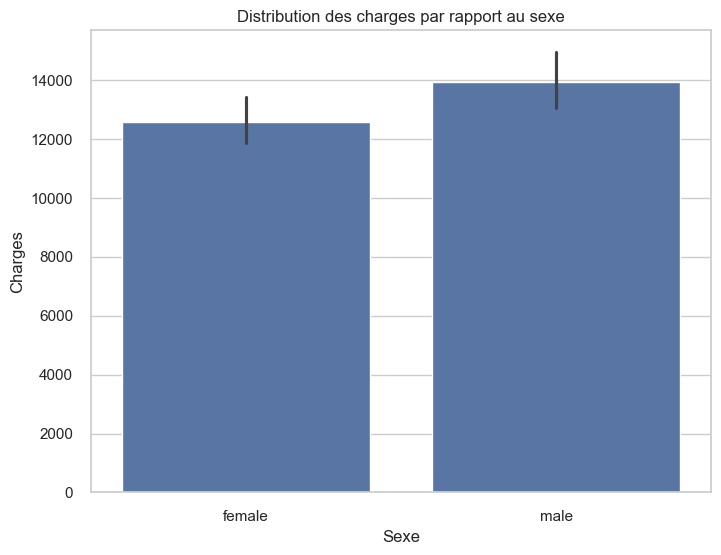

In [ ]:

plt.figure(figsize=(8, 6))
sns.barplot(x="sex", y="charges", data=data_frame)
plt.title("Distribution des charges par rapport au sexe")
plt.xlabel("Sexe")
plt.ylabel("Charges")
plt.show()



* Répartition Fumeurs vs Non-fumeurs && Répartition par région

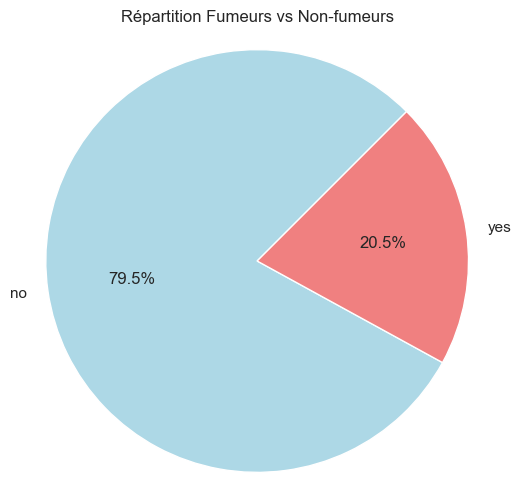

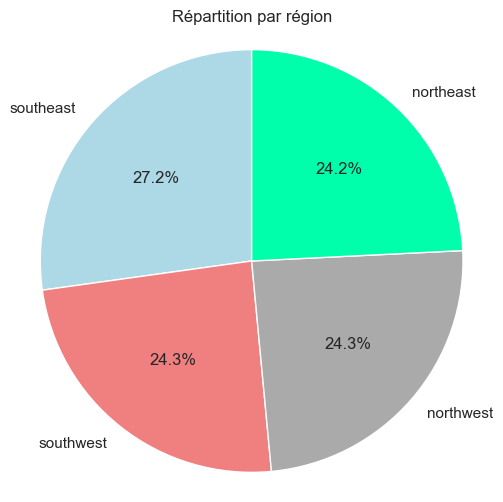

In [235]:

data = data_frame['smoker'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=45, colors=['lightblue', 'lightcoral'])
plt.title('Répartition Fumeurs vs Non-fumeurs')
plt.axis('equal') 
plt.show()

data = data_frame['region'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', '#aaaaaa', '#00FFAA'])
plt.title('Répartition par région')
plt.axis('equal') 
plt.show()

* matrices de corrélation et de visualisations

   age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520


Text(0.5, 1.0, 'matrices de corrélation des variables numériques : ')

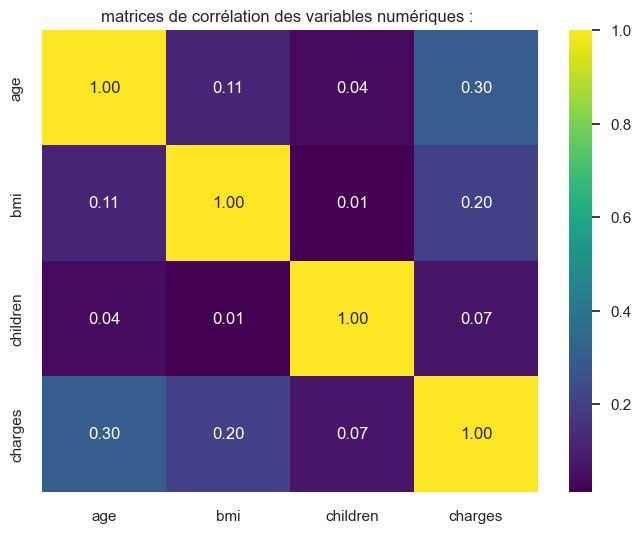

In [ ]:
# pour les variables numériques : 
numeric_df = data_frame.select_dtypes(include=[np.number])
print(numeric_df.head())

plt.figure(figsize=(8, 6))
sbr.heatmap(numeric_df.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("matrices de corrélation des variables numériques : ")

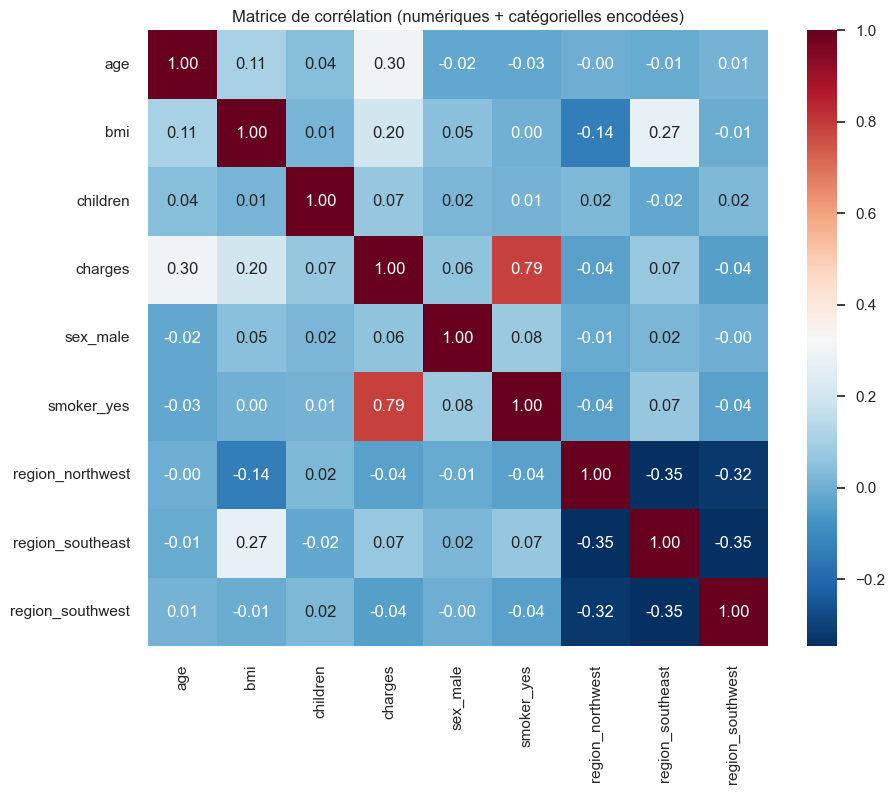

In [233]:

# pour les colonnes catégorielles et numériques : 

encoded_df = pd.get_dummies(data_frame, drop_first=True)
# print(encoded_df)

plt.figure(figsize=(10, 8))
sbr.heatmap(encoded_df.corr(), annot=True, cmap="RdBu_r", fmt=".2f")
plt.title("Matrice de corrélation (numériques + catégorielles encodées)")
plt.show()
